# Gesture Recognition

In this group project, We have build hand gesture 

In this group project, we have developed hand gesture recognition model by using CNN convolution imaging / 3D CNN imaging type of models.

## Objective: 

Series of Videos (30 frames) are provided with showing 5 gesture moments. Objective is to develop the deep learning model to classify videos into one of the 5 moves (Left Swipe, Right Swipe, Stop gesture, thumbs up or thumbs down).

1. Develop CNN Model, by using 3d convolution that means, extract the feature from entire frames in the video and followed by fully connected to classify the image 

2. Extract the feature extractions for each frame separately and use time dimension analysis with RNN and classify the video
    
3. Extract the features from any of pre trained model, and use RNN style algorithm to classify the video    
    
</b>


In [1]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#My content Path
file_path = "/content/DLL/Project_data"

In [0]:
import numpy as np
import os
import imageio 
import datetime
import os
from PIL import Image 

We set the random seed so that the results don't vary drastically.

In [0]:
np.random.seed(30)
import random as rn
rn.seed(30)
#%tensorflow_version 1.x
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [0]:
#main parameters

#Parameter configurations 

train_doc = np.random.permutation(open(file_path+'/train.csv').readlines())
val_doc = np.random.permutation(open(file_path+'/val.csv').readlines())

#each model may have differnt set of parameters

batch_size = 60
resizing_width =224 
resizing_height =224


In [0]:
# Review the target variable classifications between Target & Validaion set

import pandas as pd
dd=pd.DataFrame([i.split(";") for i in val_doc])
dd.columns =["File_name",'type','id']
print("Validation set")
display(dd.pivot_table(values='File_name', index='id', columns='type', 
                         aggfunc=lambda x: len(x.unique())))
dd=pd.DataFrame([i.split(";") for i in train_doc])
dd.columns =["File_name",'type','id']

print("Validation set")
display(dd.pivot_table(values='File_name', index='id', columns='type', 
                         aggfunc=lambda x: len(x.unique())))

Validation set


type,Left Swipe_new_Left Swipe_new,Left_Swipe_new,Right Swipe_new,Right_Swipe_new,Stop Gesture_new,Stop_new,Thumbs Down_new,Thumbs Up_new,Thumbs_Down_new,Thumbs_Up_new
id,,,,,,,,,,
0\n,5.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1\n,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2\n,NaN,NaN,NaN,NaN,8.0,14.0,NaN,NaN,NaN,NaN
3\n,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,12.0,NaN
4\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,10.0


Validation set


type,Left Swipe_new_Left Swipe_new,Left_Swipe_new,Right Swipe_new,Right_Swipe_new,Stop Gesture_new,Stop_new,Thumbs Down_new,Thumbs Up_new,Thumbs_Down_new,Thumbs_Up_new
id,,,,,,,,,,
0\n,40.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1\n,NaN,NaN,34.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN
2\n,NaN,NaN,NaN,NaN,37.0,93.0,NaN,NaN,NaN,NaN
3\n,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,100.0,NaN
4\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,87.0


#### Review comments 

Distribution of Target variable in training data set appeared to be closely matching with the distribution of validation set .

<font color ="red"> While reviewing images in the test data set noticed that provided frames are in seperate dimentions and some frames are like 380 * 380 and some in 160 * 160. for modeling it is importent to reshare all frames to the same size.</font>

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [0]:
#from keras.applications.vgg16 import preprocess_input

def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #img_idx = list(np.arange(1,30,2))
    img_idx = [0,1,2,4,5,6,9,10,12,13,15,16,20,21,24,25,28,29]
    while True:
        t = np.random.permutation(folder_list)
        num_batches = int(len(folder_list)/batch_size)
        print(f"Number of batches {num_batches}")
        for batch in range(num_batches): # we iterate over the number of batches
            x= len(img_idx)           
            y=resizing_width
            z=resizing_height
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                #print(imgs)
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    #image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #print(folder + (batch*batch_size))
                    #print(imgs[item])
                    image=Image.open(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                    
                    #Croping and Resizing Logics logic based on % of broder getting eliminated 
                    # _width, _height = image.size 
                    # left = int((_width *0.05)/2)
                    # top =  int((_height *0.05)/2)
                    # right = _width -(left*2)
                    # bottom = _height -(top*2)
                    # image = image.crop((left, top, right, bottom)).resize((resizing_width,resizing_height),Image.ANTIALIAS)

                   # image = preprocess_input(image)

                    try:
                      from keras.preprocessing.image import img_to_array
                      image = image.resize((resizing_width,resizing_height),Image.NEAREST)
                      image = img_to_array(image)
                      from keras.applications.vgg16 import preprocess_input
                    # first batch
                      image = preprocess_input(image)
                      batch_data[folder,idx,:,:,0] = np.array(image).astype(float)[:,:,0]
                      batch_data[folder,idx,:,:,1] = np.array(image).astype(float)[:,:,1]
                      batch_data[folder,idx,:,:,2] = np.array(image).astype(float)[:,:,2]
                    except:
                      print("first "+source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])

                                        
                    # batch_data[folder,idx,:,:,0] = np.array(image).astype(float)[:,:,0]/255
                    # batch_data[folder,idx,:,:,1] = np.array(image).astype(float)[:,:,1]/255
                    # batch_data[folder,idx,:,:,2] = np.array(image).astype(float)[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches\
        if len(folder_list) >batch_size * num_batches:
            x=len(img_idx)
            start = (num_batches*batch_size)
            remaining = len(folder_list) - start        
            batch_data = np.zeros((remaining,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((remaining,5)) # batch_labels is the one hot representation of the output
            #print(batch_data.shape)
            for folder in range(start,len(folder_list)): # iterate over the batch_size
              imgs = os.listdir(source_path+'/'+ t[folder].split(';')[0]) # read all the images in the folder
              for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    #image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                image=Image.open(source_path+'/'+ t[folder].strip().split(';')[0]+'/'+imgs[item])
                from keras.preprocessing.image import img_to_array
                image = image.resize((resizing_width,resizing_height),Image.NEAREST)
                image = img_to_array(image)
                    # last batch
                from keras.applications.vgg16 import preprocess_input
                image = preprocess_input(image)
                batch_data[folder-start,idx,:,:,0] = np.array(image).astype(float)[:,:,0]
                batch_data[folder-start,idx,:,:,1] = np.array(image).astype(float)[:,:,1]
                batch_data[folder-start,idx,:,:,2] = np.array(image).astype(float)[:,:,2]
                    
                    #Croping and Resizing Logics logic based on % of broder getting eliminated 
                    # _width, _height = image.size 
                    # left = int((_width *0.05)/2)
                    # top =  int((_height *0.05)/2)
                    # right = _width -(left*2)
                    # bottom = _height -(top*2)
                    # image = image.crop((left, top, right, bottom)).resize((resizing_width,resizing_height),Image.ANTIALIAS)

                    # #image = preprocess_input(image)
                                        
                    # batch_data[folder-start,idx,:,:,0] = np.array(image).astype(float)[:,:,0]/255
                    # batch_data[folder-start,idx,:,:,1] = np.array(image).astype(float)[:,:,1]/255
                    # batch_data[folder-start,idx,:,:,2] = np.array(image).astype(float)[:,:,2]/255
                    
              batch_labels[folder-start, int(t[folder-start].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        
        

In [0]:
### Review Comments 

In the above generator, tried several variations of Image pre processing activities sum of them are 

a. tried with different cropping settings (5% universally from all 4 boders / 10% from all side of borders)

b. different normalization techinique on individual layers

c. standatd pre processing units comes with VGG16 and other models.

d. different set of input image sequences .such as every 2nd image, and random set of image indexes, first 15 images & last 15 images. however choosen to go with 18 random index which given better performence.

#### Finally utlized VGG16 pre processing module which gives slightly better edge over all previous attemps.


# New Section

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [0]:
curr_dt_time = datetime.datetime.now()
train_path = file_path+'/train'
val_path = file_path+'/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

# Model -1 

Following Model is developed with 3D convolution network design. In this design all frames are processed same time to extract features through 3D CNN layers and followed by the fully connected dense layer to argument the features for classification.


In [0]:

from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout,LSTM,GlobalAveragePooling2D,Reshape
from keras.layers.convolutional import Conv3D,Conv2D, MaxPooling3D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2
import keras
#from mish import Mish

#MODEL Parameters
resizing_width=60
resizing_height=60

from keras import backend as K
def activation_function(inputs):
    return inputs * K.tanh(K.softplus(inputs))



model =Sequential()
num_classes=5

model.add(Conv3D(256, (2, 2, 2), padding='same', input_shape=(18,resizing_width,resizing_height,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(1, 2, 2),strides=(1, 2, 2)))

# model.add(Conv3D(256, (3, 3, 3), padding='same'))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(1, 2, 2),strides=(1, 3, 3)))

model.add(Conv3D(128, (3,3,3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Dropout(.1))

model.add(Conv3D(34, (2, 2, 2), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(1, 2, 2),strides=(1, 3, 3)))
model.add(Dropout(.1))

#reshare to sequence for Dense processing

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(.3))
model.add(Dense(5, activation='softmax'))


optimiser=keras.optimizers.Adamax(lr=0.0001, beta_1=0.3, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 18, 60, 60, 256)   6400      
_________________________________________________________________
activation_21 (Activation)   (None, 18, 60, 60, 256)   0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 18, 60, 60, 256)   1024      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 18, 30, 30, 256)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 18, 30, 30, 128)   884864    
_________________________________________________________________
activation_22 (Activation)   (None, 18, 30, 30, 128)   0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 18, 30, 30, 128)  

### Review comment 

Experiment is conducted with several variations one of them started with the less number of number of filters on the initial 3D convolution layers (32, 64, 128,256) and also with and without strides. however finally choosen the above approch of 4 3D convolution layers with appropriate strides to pooling layers between each convolution. 

by this, convolutions layers extractes maximum features from all frames in one go amoung all vedio batchs. and data aurgumentation with the fully connected dense layers.

Initially while expermenting expereinced model overfitted with training data. further added / increased dropouts inbetween the FC, brought results between training and validation data set is closer.

### Parameters:

##### Batch Size =10

##### Epoches =30

##### <font color ="red">Image input resolution = 90 x 90</font>
    



Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [0]:
#training the model

batch_size =30
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

#model call backs and history capturing
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
   
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,min_delta=0.0001, cooldown=0, min_lr=0) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

#derive the batch and sequence optmization
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

## Model -1 Training


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [0]:
history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/30
Source path =  /content/DLL/Project_data/train ; batch size = 30
Number of batches 22
Source path =  /content/DLL/Project_data/val ; batch size = 30
Number of batches 3





Number of batches 3
Number of batches 3
23/23 [==============================] - 33s 1s/step - loss: 2.1087 - categorical_accuracy: 0.2149 - val_loss: 1.5715 - val_categorical_accuracy: 0.2600

Epoch 00001: saving model to model_init_2020-03-0209_46_00.353736/model-00001-2.11536-0.22323-1.57153-0.26000.h5
Epoch 2/30
23/23 [==============================] - 25s 1s/step - loss: 1.6172 - categorical_accuracy: 0.3052 - val_loss: 1.4953 - val_categorical_accuracy: 0.3000

Epoch 00002: saving model to model_init_2020-03-0209_46_00.353736/model-00002-1.62482-0.29110-1.49533-0.30000.h5
Epoch 3/30
23/23 [==============================] - 26s 1s/step - loss: 1.6056 - categorical_accuracy: 0.3116 - val_loss: 1.5095 - val_categorical_accuracy: 0.3500

Epoch 00003: saving model to model_init_2020-03-0209_46_00.353736

KeyboardInterrupt: ignored

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy', 'lr'])


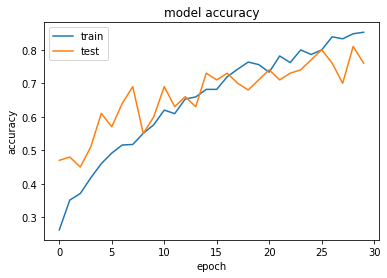

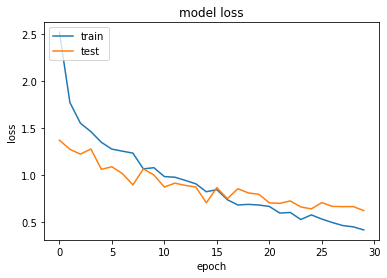

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model -1 Summary 

Above Graphs indicates both training and validation errors are reduced along with the increase of number of epoches (experiment is conducted with even with 45 epoches however model is not indictaes any good progress  over 30 epoches.

Also model is trained with the variatiosn like 

a. Different Image resolutions 
b. different Image pre processing activities 

Finally Choosen model with 90 x 90 size since it gives less number of parameters of total 4 Million with the same level accuracy.


# MODEL-2 (Pre Trained + FC)

Following model is trained by extracting features from pre-trained popular VGG 16 layer and followed by the fully connected dense network to argument and classify the images. since we are working on vedio with (30 frames). all frames are processed in different time dimention with VGG network and followed by the GRU type Recurrent network and then connected with Dense layer.


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras import regularizers

# base_model = ResNet50(weights='imagenet',  include_top=False)

resizing_width=224
resizing_height=224

vgg = VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3))
for layer in vgg.layers[:-4]:
     layer.trainable = False

model = Sequential()
model.add(
    TimeDistributed(vgg, input_shape=(18, 224, 224, 3))
)

model.add(TimeDistributed(Flatten()))
model.add(GRU(100, activation='relu', recurrent_regularizer=regularizers.l2(0.01),return_sequences=False))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(5, activation='softmax'))



optimiser=keras.optimizers.Adamax(lr=0.0001, beta_1=0.3, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_71 (TimeDis (None, 18, 7, 7, 512)     14714688  
_________________________________________________________________
time_distributed_72 (TimeDis (None, 18, 25088)         0         
_________________________________________________________________
gru_31 (GRU)                 (None, 100)               7556700   
_________________________________________________________________
dropout_94 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_95 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)              

### Comments 

Experiment is conducted with different variations like Time(VGG16) -> Time(Dense) ->RN(GRU) -> FC / Time(VGG16) -> Time(Dense) ->RN(GRU) -> Dense Target . With different number of layers and different number of neurons. however satstfied with the above architecture

also tried with different approches Rssnet vs VGG16 avs VGG19. 

### Parameters:

#### Batch Size =8 (since lot of parms involved)
#### Epoches = 45 
#### Input dim = 224 * 224 


In [0]:
#training the model

batch_size =8
num_epochs = 45

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

#model call backs and history capturing
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
   
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,min_delta=0.0001, cooldown=0, min_lr=0) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

#derive the batch and sequence optmization
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

## Model-2 Training



In [0]:
history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/45
Source path =  /content/DLL/Project_data/val ; batch size =Source path =  /content/DLL/Project_data/train ; batch size = 8
 Number of batches 828

Number of batches 12
82/83 [============================>.] - ETA: 0s - loss: 5.5866 - categorical_accuracy: 0.1905Number of batches 82
Number of batches 12
83/83 [==============================] - 68s 822ms/step - loss: 5.5632 - categorical_accuracy: 0.1900 - val_loss: 2.7052 - val_categorical_accuracy: 0.1600

Epoch 00001: saving model to model_init_2020-02-2921_03_05.141901/model-00001-5.56605-0.19005-2.70523-0.16000.h5
Epoch 2/45
82/83 [============================>.] - ETA: 0s - loss: 2.9814 - categorical_accuracy: 0.2226Number of batches 82
Number of batches 12
83/83 [==============================] - 53s 638ms/step - loss: 2.9763 - categorical_accuracy: 0.2216 - val_loss: 2.6432 - val_categorical_accuracy: 0.1800

Epoch 00002: saving model to model_init_2020-02-2921_03_05.141901/model-00002-2.97692-0.22172-2.64315-0.18000.h

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy', 'lr'])


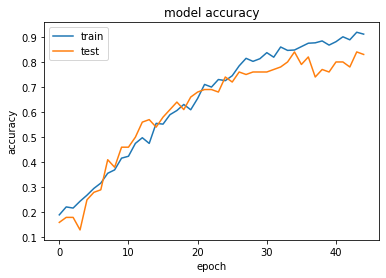

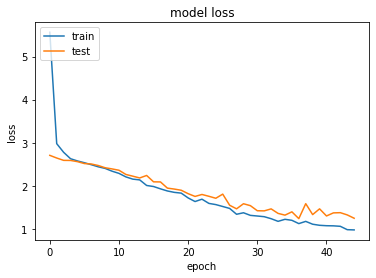

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Review Comments

Above visuals indicates that with the increases of epoches, learning rate increased and subseqently both training and validation errors are apeared to be down. however after reaching 35+ epoches even training set scores indicates increased subseqently difference between training and validation set is slightly increased. 

## MODEL-3 (CNN + RNN + FC)

Model is developed by extracting features from individual frames of image's and processed through the recurrent neural network and folllwed by the dense layer to classify vedio amount 5 classes.

In [0]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout,LSTM,GlobalAveragePooling2D,Reshape
from keras.layers.convolutional import Conv3D,Conv2D, MaxPooling3D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2

resizing_width=60
resizing_height=60

# #write your model here
model =Sequential()
num_classes=5
model.add(TimeDistributed(
            Conv2D(512, (2,2), padding='same', strides = 1),
            input_shape=(None, resizing_width, resizing_height, 3)))
model.add(TimeDistributed(Activation("relu")))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Conv2D(128, (2, 2))))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
#model.add(TimeDistributed(Dropout(0.3)))

model.add(TimeDistributed(Conv2D(20, (2,2), padding='same')))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))


# model.add(TimeDistributed(Conv2D(256, (2, 2), padding='same')))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(3, 3))))

# model.add(TimeDistributed(Conv2D(128, (2, 2), padding='same')))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
# model.add(TimeDistributed(Dropout(0.3)))


model.add(TimeDistributed(Flatten()))

#model.add(Dense(512,activation="relu"))

# model.add(TimeDistributed(Dense(64,activation="relu",kernel_regularizer=l2(0.01))))
# model.add(TimeDistributed(Dropout(0.2)))
# model.add(TimeDistributed(Dense(256,activation="relu",kernel_regularizer=l2(0.01))))
# model.add(TimeDistributed(Dropout(0.3)))
# model.add(TimeDistributed(Dense(128,activation="relu",kernel_regularizer=l2(0.01))))
# model.add(TimeDistributed(Dropout(0.3)))

model.add(GRU(100, return_sequences = False,recurrent_dropout=0.5))

# model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.4))
# model.add(Dense(32,activation="relu"))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


optimiser=keras.optimizers.Adamax(lr=0.0001, beta_1=0.3, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_92 (TimeDis (None, None, 60, 60, 512) 6656      
_________________________________________________________________
time_distributed_93 (TimeDis (None, None, 60, 60, 512) 0         
_________________________________________________________________
time_distributed_94 (TimeDis (None, None, 60, 60, 512) 2048      
_________________________________________________________________
time_distributed_95 (TimeDis (None, None, 30, 30, 512) 0         
_________________________________________________________________
time_distributed_96 (TimeDis (None, None, 29, 29, 128) 262272    
_________________________________________________________________
time_distributed_97 (TimeDis (None, None, 29, 29, 128) 0         
_________________________________________________________________
time_distributed_98 (TimeDis (None, None, 29, 29, 128)

### Review comments 

Model is tried with different variations including 

a. grayscale image (instead of 3 layes RBG)
b. CNN + RNN
c. CNN + DENSE + RNN +FC 
d. with different variations of few number of fileters on CNN with and without strides

Finally experimented with 3 convolution + Dense + RNN (GRU) + FC


In [0]:
#training the model

batch_size =20
num_epochs = 35

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

#model call backs and history capturing
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
   
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,min_delta=0.0001, cooldown=0, min_lr=0) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

#derive the batch and sequence optmization
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [0]:
history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/35
Source path = Source path =   /content/DLL/Project_data/train/content/DLL/Project_data/val  ; batch size = 20
; batch size =Number of batches 33 
20
Number of batches 5
Number of batches 5


ResourceExhaustedError: ignored

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy', 'lr'])


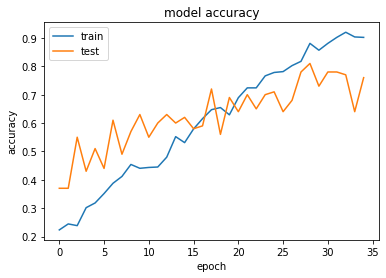

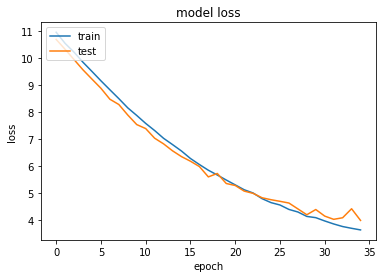

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Review comments 

Even through loss is comes down along with the number of epoches but, validation accuracy levels indicates high volitile with number of epoches.

# FINAL REVIEW comments 


Experement is conducted with different valiations (3DCNN + FC), (VGG16 + RNN +FC) and (CNN2D + DENSE + RNN + FC) however we are recomended to take CNN3D + FC approch because of following 

a. Trainable parameters are very less around 4 Milion comparing with other models this is very less 

b. Model can work with less number of image resolution such as low as 90 X 90 

Initially while developing model, expereimented with different variations in input processing 

1. Converting into Gray scale and processed with CONV 2d alone 

2. different set of crop factros such as 5% and 10% of images 

3. different set of normalizations on layer representations

4. different set of pre trained image processing techniques such as VGG16 & RSSNET50 

different set of network layers / neurons at variaious filters .such as 

1. low number of features in the top convolution and susqently increasing number of features in hidden layers 

2. with and without strides & different levels of pooling layers 

3. different set of combinations of convolutions and dense layers 

4. tried with different activation functions such as <b>Mesh activation google research </b> vs Relu 

5. different Loss functions Adam vs SGD


<b>What we have learned in this exercise</b>

a. Number of fileters helps to increase the number of features insights through CNN.

b. based on objective strides need to be selected if macro features's are selecting this need be selected at most precaution 

c. Pooling layer help in reduce the number of input dimentions and optmize performence across going on hidden layers 

d. Even after extracting number of featres, it is importent to have high number of dense layer to argument the features inorder to train for objective 

e. Drop-outs & regularization parameters will really helps 

### Recomendations:

Using of CONV 3D + FC because it has less number of parameters.



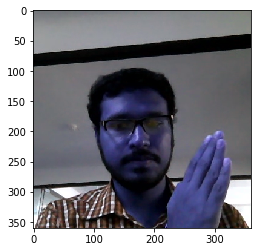

In [0]:
path="/content/drive/My Drive/DL/Project_data/val/WIN_20180907_15_30_06_Pro_Right Swipe_new/WIN_20180907_15_30_06_Pro_00015.png"

im=cv2.imread(path)
plt.imshow(im)
plt.show()


In [0]:
!unzip -qq "/content/drive/My Drive/DL/Project_data.zip" -d /content/DLL/

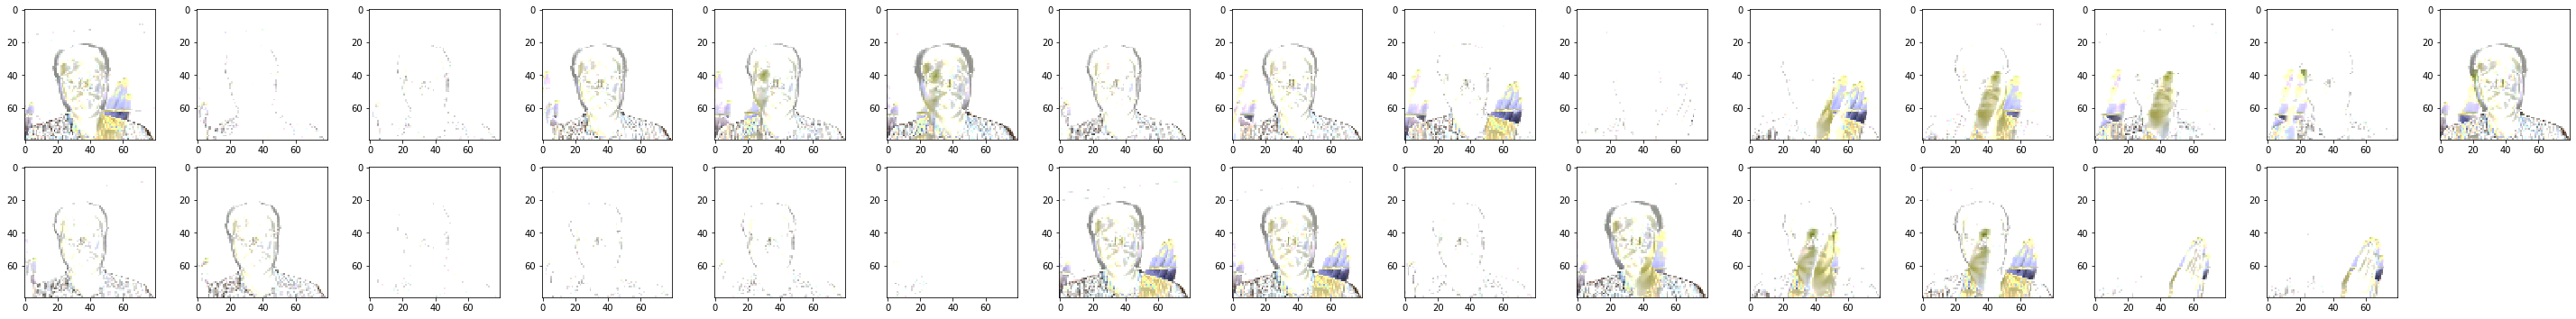

In [2]:
path ="/content/drive/My Drive/DL/Project_data/val/WIN_20180907_15_30_06_Pro_Right Swipe_new"
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

files = os.listdir(path)

#f, axarr = plt.subplots(2,15)
#plt.figure(figsize=(5,20))
fig, ax = plt.subplots(nrows=2, ncols=15)
fig.set_size_inches(40,5)

for i in range(1,len(files)):
  j =i-1
  row = int(j/15)
  col = j - int(j/15) *15
  first_image =cv2.imread(path+"/"+files[i-1]).astype(np.float32)
  first_image = cv2.resize(first_image,(80,80))
  
  secod_image = cv2.imread(path+"/"+files[i]).astype(np.float32)
  secod_image = cv2.resize(secod_image,(80,80))

  im = cv2.absdiff(first_image,secod_image)
  # im = abs(im-255)
  #resized = cv2.resize(im, (10,10), interpolation = cv2.INTER_AREA)
  # ax[row,col].imshow(im/255)
  thresh = cv2.threshold(im, 25, 255, cv2.THRESH_TOZERO)[1]
  #thresh = cv2.dilate(thresh, None, iterations=2)
  thresh = abs(thresh-255)
  ax[row,col].imshow(thresh/255)
  

  #axarr[row,col].imshow(resized)
  
ax.flat[-1].set_visible(False)  
plt.tight_layout(True)
#plt.show()
  #print(row,col)




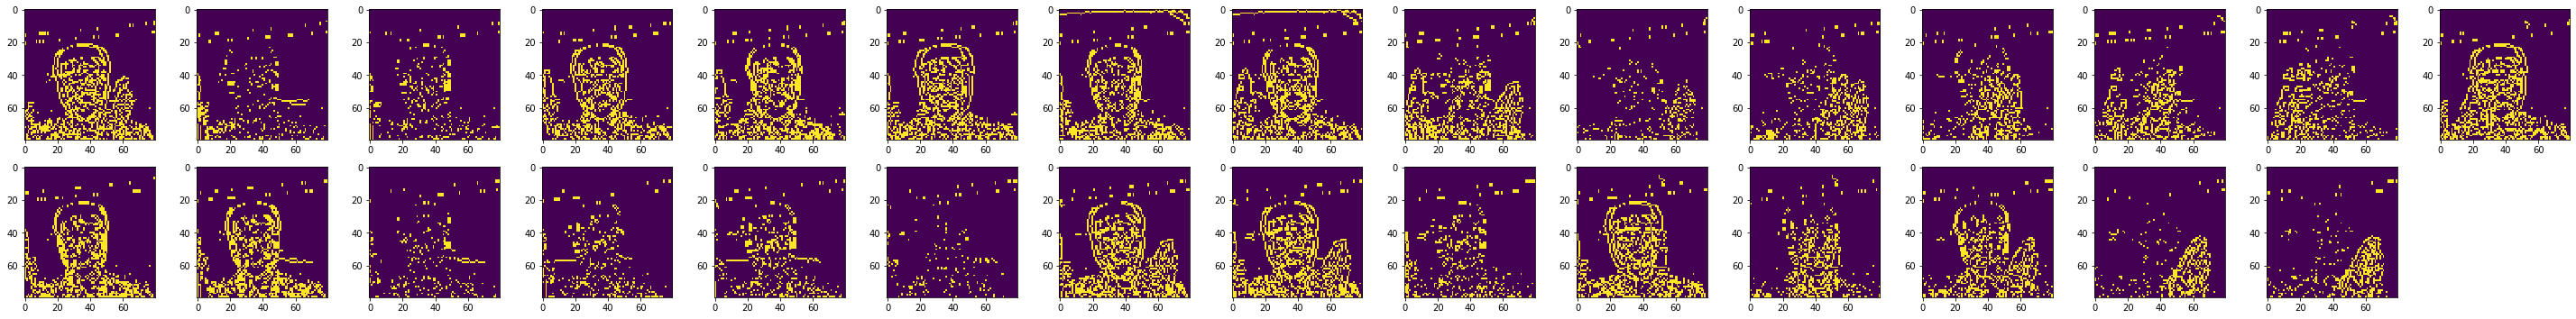

In [12]:
path ="/content/drive/My Drive/DL/Project_data/val/WIN_20180907_15_30_06_Pro_Right Swipe_new"
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

files = os.listdir(path)

#f, axarr = plt.subplots(2,15)
#plt.figure(figsize=(5,20))
fig, ax = plt.subplots(nrows=2, ncols=15)
fig.set_size_inches(40,5)

for i in range(1,len(files)):
  j =i-1
  row = int(j/15)
  col = j - int(j/15) *15
  first_image =cv2.imread(path+"/"+files[i-1])
  first_image = cv2.resize(first_image,(80,80))
  first_image = cv2.Canny(first_image,100,20)
  
  secod_image = cv2.imread(path+"/"+files[i])
  secod_image = cv2.resize(secod_image,(80,80))
  secod_image = cv2.Canny(secod_image,100,20)


  im = cv2.absdiff(first_image,secod_image)
  # im = abs(im-255)
  #resized = cv2.resize(im, (10,10), interpolation = cv2.INTER_AREA)
  # ax[row,col].imshow(im/255)
  #thresh = cv2.threshold(im, 25, 255, cv2.THRESH_TOZERO)[1]
  #thresh = cv2.dilate(thresh, None, iterations=2)
  #thresh = abs(thresh-255)
  #im = cv2.Canny(im,100,100)
  ax[row,col].imshow(im/255)
  

  #axarr[row,col].imshow(resized)
  
ax.flat[-1].set_visible(False)  
plt.tight_layout(True)
#plt.show()
  #print(row,col)




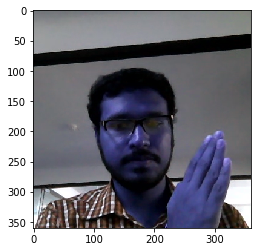

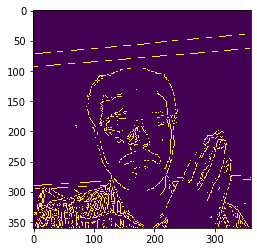

In [9]:
path ="/content/drive/My Drive/DL/Project_data/val/WIN_20180907_15_30_06_Pro_Right Swipe_new/WIN_20180907_15_30_06_Pro_00015.png"

im=cv2.imread(path)
plt.imshow(im)
plt.show()

im  = cv2.Canny(im,100,100)
plt.imshow(im)
plt.show()
